# Using @dask-delayed

## Serial Execution

In [1]:
def do_something_1(x, y):
    return x + y + 2*x*y

def do_something_2(a, b):
    return a**3 - b**3

def do_something_3(p, q):
    return p*p + q*q

In [2]:
x = [2, 4, 6, 8, 10]
y = [3, 6, 9, 12, 15]
z = [10, 20, 30, 40, 50]

final_result = []

In [3]:
for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

In [4]:
final_result

[947018, 60594020, 690180570, 3877846928, 14792746250]

In [5]:
sum(final_result)

19422314786

## Using dask.delayed 

In [6]:
from dask import delayed, compute

def do_something_1(x, y):
    return x + y + 2*x*y

def do_something_2(a, b):
    return a**3 - b**3

def do_something_3(p, q):
    return p*p + q*q

In [7]:
final_result = []
for i in range(0, len(x)):
    # Wrap the function calls inside delayed
    res_1 = delayed(do_something_1)(x[i], y[i])
    res_2 = delayed(do_something_2)(y[i], z[i])
    res_3 = delayed(do_something_3)(res_1, res_2)
    final_result.append(res_3)

final_sum = delayed(sum)(final_result)

### Lazily evaluated 

In [8]:
final_sum 

Delayed('sum-0c9e492f-c7b6-48db-a81f-029635aa0673')

### Call `compute` to execute

In [9]:
final_sum.compute()

19422314786

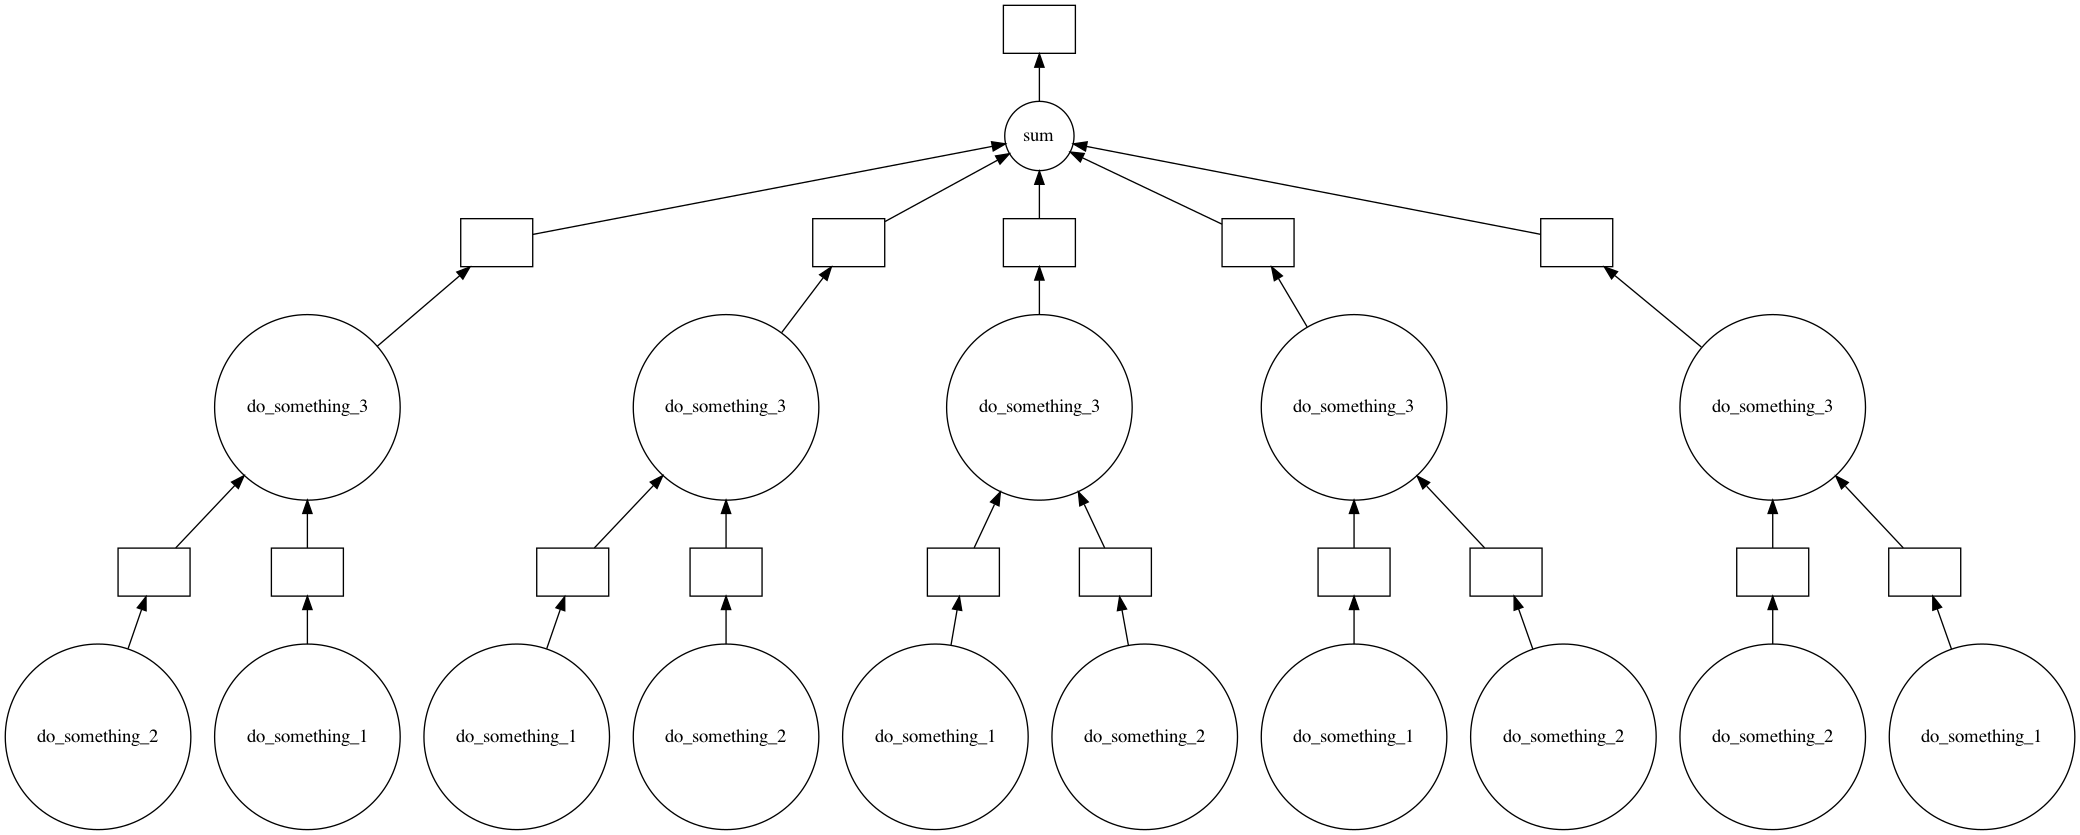

In [10]:
final_sum.visualize()

## Using @delayed decorator

In [11]:
@delayed
def do_something_1(x, y):
    return x + y + 2*x*y

@delayed
def do_something_2(a, b):
    return a**3 - b**3

@delayed
def do_something_3(p, q):
    return p*p + q*q

In [12]:
final_result = []
for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

final_sum = delayed(sum)(final_result)

In [13]:
final_sum.compute()

19422314786

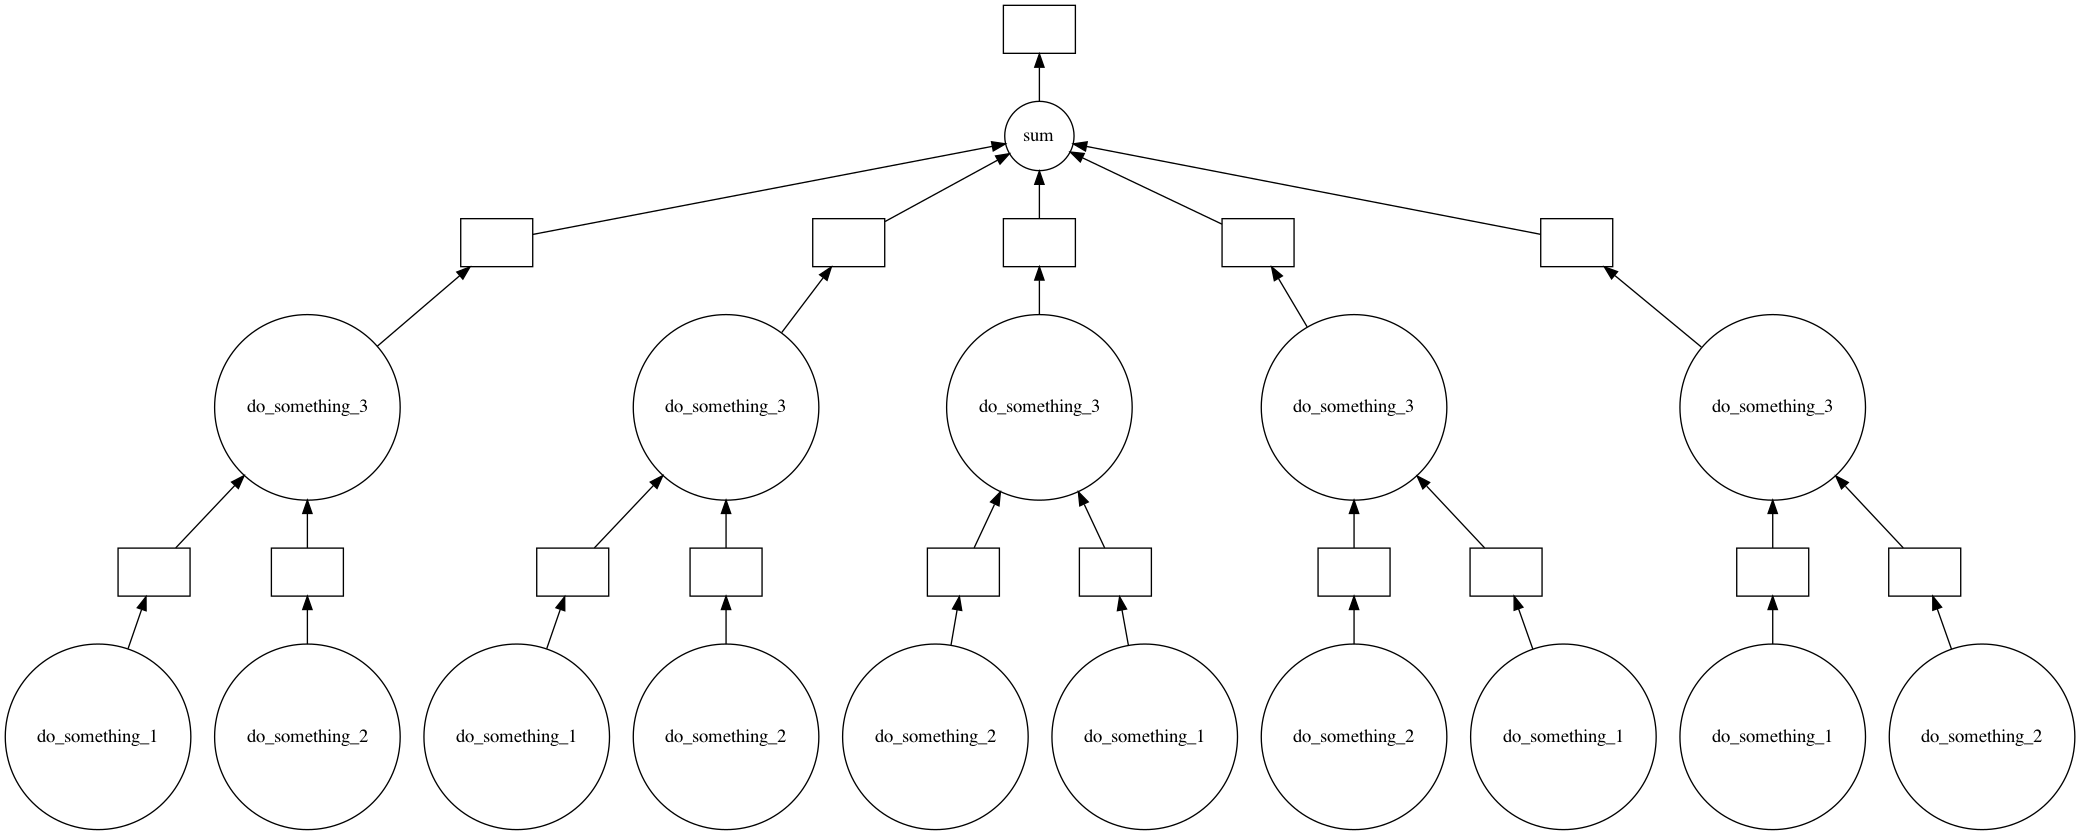

In [14]:
final_sum.visualize()